# **Project Name**    - Book Recommendation System
## Dev- Ashutosh Sharma
### **GitHub Link - https://github.com/ashutosh-sharma-xi/Book-Recommendation-System**

In [80]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
books = pd.read_csv('/content/drive/MyDrive/AlmaBetter /Capstone Project/Book Recommendation System/Book RCD Dataset /Copy of Books.csv')
ratings = pd.read_csv('/content/drive/MyDrive/AlmaBetter /Capstone Project/Book Recommendation System/Book RCD Dataset /Copy of Ratings.csv')
users = pd.read_csv('/content/drive/MyDrive/AlmaBetter /Capstone Project/Book Recommendation System/Book RCD Dataset /Copy of Users.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# **Understanding Books Data**


In [83]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.LZZZZZZZ.jpg
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.LZZZZZZZ.jpg


In [84]:
books.tail(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0440400988.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0440400988.01.LZZZZZZZ.jpg
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0525447644.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0525447644.01.LZZZZZZZ.jpg
271357,006008667X,Lily Dale : The True Story of the Town that Talks to the Dead,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/006008667X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/006008667X.01.LZZZZZZZ.jpg
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0192126040.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0192126040.01.LZZZZZZZ.jpg
271359,0767409752,A Guided Tour of Rene Descartes' Meditations on First Philosophy with Complete Translations of t...,Christopher Biffle,2000,McGraw-Hill Humanities/Social Sciences/Languages,http://images.amazon.com/images/P/0767409752.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0767409752.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0767409752.01.LZZZZZZZ.jpg


In [85]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [86]:
for col in books:
  print(col,' : ',books[col].unique(),'\n\n')

ISBN  :  ['0195153448' '0002005018' '0060973129' ... '006008667X' '0192126040'
 '0767409752'] 


Book-Title  :  ['Classical Mythology' 'Clara Callan' 'Decision in Normandy' ...
 'Lily Dale : The True Story of the Town that Talks to the Dead'
 "Republic (World's Classics)"
 "A Guided Tour of Rene Descartes' Meditations on First Philosophy with Complete Translations of the Meditations by Ronald Rubin"] 


Book-Author  :  ['Mark P. O. Morford' 'Richard Bruce Wright' "Carlo D'Este" ...
 'David Biggs' 'Teri Sloat' 'Christopher  Biffle'] 


Year-Of-Publication  :  [2002 2001 1991 1999 2000 1993 1996 1988 2004 1998 1994 2003 1997 1983
 1979 1995 1982 1985 1992 1986 1978 1980 1952 1987 1990 1981 1989 1984 0
 1968 1961 1958 1974 1976 1971 1977 1975 1965 1941 1970 1962 1973 1972
 1960 1966 1920 1956 1959 1953 1951 1942 1963 1964 1969 1954 1950 1967
 2005 1957 1940 1937 1955 1946 1936 1930 2011 1925 1948 1943 1947 1945
 1923 2020 1939 1926 1938 2030 1911 1904 1949 1932 1928 1929 1927 1931
 1914 2

In [87]:
# books that were published before 20th century
books[(books['Year-Of-Publication'] == 0)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
176,3150000335,Kabale Und Liebe,Schiller,0,"Philipp Reclam, Jun Verlag GmbH",http://images.amazon.com/images/P/3150000335.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/3150000335.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/3150000335.01.LZZZZZZZ.jpg
188,342311360X,Die Liebe in Den Zelten,Gabriel Garcia Marquez,0,Deutscher Taschenbuch Verlag (DTV),http://images.amazon.com/images/P/342311360X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/342311360X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/342311360X.01.LZZZZZZZ.jpg
288,0571197639,Poisonwood Bible Edition Uk,Barbara Kingsolver,0,Faber Faber Inc,http://images.amazon.com/images/P/0571197639.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0571197639.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0571197639.01.LZZZZZZZ.jpg
351,3596214629,"Herr Der Fliegen (Fiction, Poetry and Drama)",Golding,0,Fischer Taschenbuch Verlag GmbH,http://images.amazon.com/images/P/3596214629.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/3596214629.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/3596214629.01.LZZZZZZZ.jpg
542,8845229041,Biblioteca Universale Rizzoli: Sulla Sponda Del Fiume Piedra,P Coelho,0,Fabbri - RCS Libri,http://images.amazon.com/images/P/8845229041.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/8845229041.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/8845229041.01.LZZZZZZZ.jpg
...,...,...,...,...,...,...,...,...
270794,014029953X,Foe (Essential.penguin S.),J.M. Coetzee,0,Penguin Books Ltd,http://images.amazon.com/images/P/014029953X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/014029953X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/014029953X.01.LZZZZZZZ.jpg
270913,0340571187,Postmens House,Maggie Hemingway,0,Trafalgar Square,http://images.amazon.com/images/P/0340571187.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0340571187.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0340571187.01.LZZZZZZZ.jpg
271094,8427201079,El Misterio De Sittaford,Agatha Christie,0,Editorial Molino,http://images.amazon.com/images/P/8427201079.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/8427201079.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/8427201079.01.LZZZZZZZ.jpg
271182,0887781721,Tom Penny,Tony German,0,P. Martin Associates,http://images.amazon.com/images/P/0887781721.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0887781721.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0887781721.01.LZZZZZZZ.jpg


In [88]:
import re
# Some Year of publication had title name in place of Year of Publication so dropping them
# get indexes of all those rows and then drop them
drop_indexes = books[books.loc[:,'Year-Of-Publication'].str.contains(pat = 'i[a-z]', regex = True) == True].index
books.drop(index = drop_indexes , inplace = True)

In [89]:
# convert Year of publication to integer type
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype('int64')

In [90]:
 # books that were published before 20th century
 books[(books['Year-Of-Publication'] < 1900) & (books['Year-Of-Publication'] > 0)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
171817,0781228956,"Complete Works 10 Volumes [2,6,7,8,9] (Notable American Authors)",Benjamin Franklin,1806,Reprint Services Corp,http://images.amazon.com/images/P/0781228956.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0781228956.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0781228956.01.LZZZZZZZ.jpg
227531,9643112136,Dalan-i bihisht (Dastan-i Irani),Nazi Safavi,1378,Intisharat-i Quqnus,http://images.amazon.com/images/P/9643112136.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/9643112136.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/9643112136.01.LZZZZZZZ.jpg
245607,0781268001,"Hugh Wynne, Free Quaker (2 Volumes (BCL1-PS American Literature)",Silas Weir Mitchell,1897,Reprint Services Corp,http://images.amazon.com/images/P/0781268001.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0781268001.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0781268001.01.LZZZZZZZ.jpg
253750,964442011X,Tasht-i khun,IsmaÂ°il Fasih,1376,Nashr-i Alburz,http://images.amazon.com/images/P/964442011X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/964442011X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/964442011X.01.LZZZZZZZ.jpg


In [91]:
# some basic data cleaning
# convert all columns to lower case
for col in books:
  try:
    books[col] =  books[col].str.lower()
  except:
    pass

In [92]:
books['Book-Author'].value_counts()

agatha christie        636
william shakespeare    570
stephen king           534
ann m. martin          423
francine pascal        419
                      ... 
keith abbott             1
josefina r. aldecoa      1
william o. douglas       1
clarence meyer           1
christopher  biffle      1
Name: Book-Author, Length: 99339, dtype: int64

In [93]:
# List of books by authors
auth_books = books.groupby(['Book-Author'])['Book-Title'].agg(list)
auth_df = pd.DataFrame(auth_books)
Book_No = [len(c) for c in auth_df['Book-Title']]
auth_df['Number_of_Books'] = Book_No
auth_df.sort_values('Number_of_Books', ascending= 0)


,Book-Title,Number_of_Books
Book-Author,,
agatha christie,"[sleeping murder, sleeping murder (miss marple mysteries (paperback)), a caribbean mystery, the ...",636
william shakespeare,"[julius caesar (oxford school shakespeare), othello (3rd series), king lear, othello, the traged...",570
stephen king,"[the girl who loved tom gordon, pet sematary, mientras escribo, the shining, dreamcatcher, the d...",534
ann m. martin,"[karen's school trip (baby-sitters little sister, 24), karen's doll (baby-sitters little sister,...",423
francine pascal,"[she's not what she seems (sweet valley high no. 92), spring break (sweet valley high super edit...",419
...,...,...
j montague,[clock tower],1
j martyn walsh,[plain english handbook],1
j m robertson,[pagan christs],1


# **Understanding Ratings Data**

In [94]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [95]:
ratings.tail()

,User-ID,ISBN,Book-Rating
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10
1149779,276723,05162443314,8


In [96]:
ratings.shape

(1149780, 3)

In [97]:
# value count of user id
ratings['User-ID'].value_counts()

11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
116180        1
116166        1
116154        1
116137        1
276723        1
Name: User-ID, Length: 105283, dtype: int64

In [98]:
# value count of ratings
ratings['Book-Rating'].value_counts()

0     716109
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: Book-Rating, dtype: int64

In [99]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


# **Understanding Users Data**

In [100]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [101]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [102]:
users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


In [103]:
#Age shows some outliers lets remove them
users[users['Age'] >= 120]

,User-ID,Location,Age
1578,1579,"akure, ondo/nigeria, nigeria",231.0
8457,8458,"milano, lombardia, italy",230.0
8781,8782,"calgary, alberta, canada",239.0
11325,11326,"johannesburg, gauteng, south africa",148.0
12691,12692,"jacksonville, florida, usa",151.0
...,...,...,...
257429,257430,"reutlingen, baden-wuerttemberg, germany",200.0
261553,261554,"arak, tennessee, iran",143.0
264933,264934,"madrid, madrid, spain",140.0
275582,275583,"koblenz, rheinland-pfalz, germany",189.0


In [104]:
users.Location.value_counts()

london, england, united kingdom                  2506
toronto, ontario, canada                         2250
sydney, new south wales, australia               1744
melbourne, victoria, australia                   1708
portland, oregon, usa                            1629
                                                 ... 
gneisenaustr. 3, nordrhein-westfalen, germany       1
-, bayern, germany                                  1
bouchegouf, guelma, algeria                         1
indiana and philadelphia, pennsylvania, usa         1
tacoma, washington, united kingdom                  1
Name: Location, Length: 57339, dtype: int64

# **Merge DataFrames**

In [105]:
df = ratings.merge(books, on= 'ISBN', how = 'inner')

In [106]:
df = df.merge(users, on = 'User-ID', how = 'inner')

In [107]:
df.drop(columns = ['Image-URL-S', 'Image-URL-L'], inplace = True)
df.rename(columns = {"User-ID":'Uid',"Book-Rating":'Rating',"Book-Title":'Title',"Book-Author":'Author',"Year-Of-Publication":'Pub_Year',
                     "Image-URL-M":'Image_Url',}, inplace = True)

# Understand Final DataFrame

In [108]:
df.head()

,Uid,ISBN,Rating,Title,Author,Pub_Year,Publisher,Image_Url,Location,Age
0,276726,0155061224,5,rites of passage,judith rae,2001,heinle,http://images.amazon.com/images/p/0155061224.01.mzzzzzzz.jpg,"seattle, washington, usa",NaN
1,159181,0155061224,0,rites of passage,judith rae,2001,heinle,http://images.amazon.com/images/p/0155061224.01.mzzzzzzz.jpg,"seattle, washington, usa",28.0
2,276727,0446520802,0,the notebook,nicholas sparks,1996,warner books,http://images.amazon.com/images/p/0446520802.01.mzzzzzzz.jpg,"h, new south wales, australia",16.0
3,278418,0446520802,0,the notebook,nicholas sparks,1996,warner books,http://images.amazon.com/images/p/0446520802.01.mzzzzzzz.jpg,"omaha, nebraska, usa",NaN
4,278418,0671537458,0,waiting to exhale,terry mcmillan,1995,pocket,http://images.amazon.com/images/p/0671537458.01.mzzzzzzz.jpg,"omaha, nebraska, usa",NaN


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 946676 entries, 0 to 946675
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Uid        946676 non-null  int64  
 1   ISBN       946676 non-null  object 
 2   Rating     946676 non-null  int64  
 3   Title      946676 non-null  object 
 4   Author     946675 non-null  object 
 5   Pub_Year   946676 non-null  int64  
 6   Publisher  946675 non-null  object 
 7   Image_Url  946676 non-null  object 
 8   Location   946676 non-null  object 
 9   Age        691798 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 79.4+ MB


In [110]:
# total number of unique books
books.ISBN.nunique()

271043

In [111]:
# number of duplicaete rows in the dataframe
len(df[df.duplicated()])

410

In [112]:
# drop duplicaete values
df.drop_duplicates(inplace = True)

In [113]:
# Null Values
df.isnull().sum()

Uid               0
ISBN              0
Rating            0
Title             0
Author            1
Pub_Year          0
Publisher         1
Image_Url         0
Location          0
Age          254746
dtype: int64

In [114]:
# Drop null values
df.dropna(inplace = True)

In [115]:
# books which have publish date after 2021
pd.set_option('max_colwidth', 100)
df[df.loc[:,'Pub_Year' ] > 2021]

,Uid,ISBN,Rating,Title,Author,Pub_Year,Publisher,Image_Url,Location,Age
31569,203240,0671791990,0,my teacher flunked the planet (rack size) (my teacher books),bruce coville,2030,aladdin,http://images.amazon.com/images/p/0671791990.01.mzzzzzzz.jpg,"st. louis, missouri, usa",32.0
33540,230522,0671746103,0,my teacher fried my brains (rack size) (my teacher books),coville,2030,aladdin,http://images.amazon.com/images/p/0671746103.01.mzzzzzzz.jpg,"colorado springs, colorado, usa",52.0
84935,198711,0671791990,0,my teacher flunked the planet (rack size) (my teacher books),bruce coville,2030,aladdin,http://images.amazon.com/images/p/0671791990.01.mzzzzzzz.jpg,"little canada, minnesota, usa",62.0
206104,88283,3442436893,0,das groã?â?e bã?â¶se- mã?â¤dchen- lesebuch.,kathy lette,2026,goldmann,http://images.amazon.com/images/p/3442436893.01.mzzzzzzz.jpg,"hamburg, hamburg, germany",24.0
218500,76626,0140301690,0,alice's adventures in wonderland and through the looking glass (puffin books),lewis carroll,2050,puffin books,http://images.amazon.com/images/p/0140301690.01.mzzzzzzz.jpg,"london, england, united kingdom",38.0
245246,82831,0140301690,7,alice's adventures in wonderland and through the looking glass (puffin books),lewis carroll,2050,puffin books,http://images.amazon.com/images/p/0140301690.01.mzzzzzzz.jpg,"nashville, tennessee, usa",21.0
267204,276762,0380000059,0,clout,d. gibbons,2024,avon,http://images.amazon.com/images/p/0380000059.01.mzzzzzzz.jpg,"duisburg, nordrhein-westfalen, germany",25.0
297842,100459,0870446924,0,"field guide to the birds of north america, 3rd ed.",national geographic society,2030,national geographic,http://images.amazon.com/images/p/0870446924.01.mzzzzzzz.jpg,"bay area, california, usa",38.0
298508,127429,0671791990,0,my teacher flunked the planet (rack size) (my teacher books),bruce coville,2030,aladdin,http://images.amazon.com/images/p/0671791990.01.mzzzzzzz.jpg,"kansas city, missouri, usa",23.0
307890,201548,3442436893,9,das groã?â?e bã?â¶se- mã?â¤dchen- lesebuch.,kathy lette,2026,goldmann,http://images.amazon.com/images/p/3442436893.01.mzzzzzzz.jpg,"rheinfelden, baden-wuerttemberg, germany",29.0


### Yearly Reviews

<function matplotlib.pyplot.show(*args, **kw)>

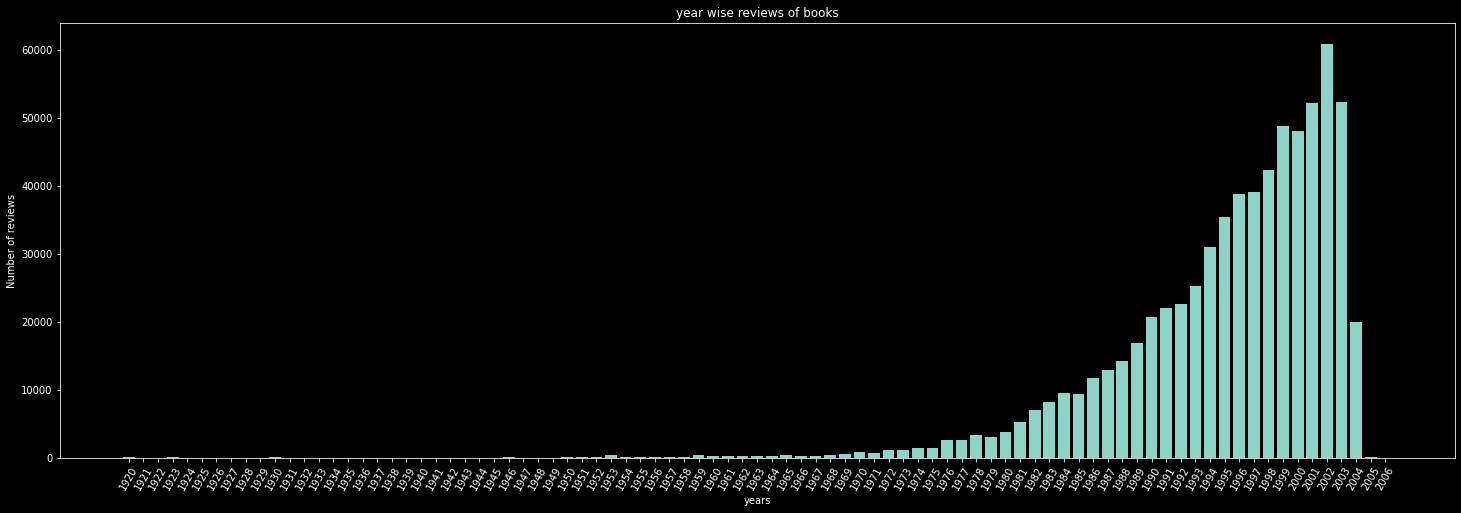

In [116]:
# year wise movies
yearly_books = df.value_counts('Pub_Year')
yearly_books = yearly_books.loc[(yearly_books.index >= 1920) & (yearly_books.index < 2010) ]
plt.figure(figsize= (25,8))
plt.title('year wise reviews of books')
plt.xlabel('years')
plt.ylabel('Number of reviews')
plt.xticks(np.arange(1920,2007, 1), rotation = 60)
plt.bar( yearly_books.index,yearly_books.values , width = 0.8 )
plt.show

### Distribution of ages

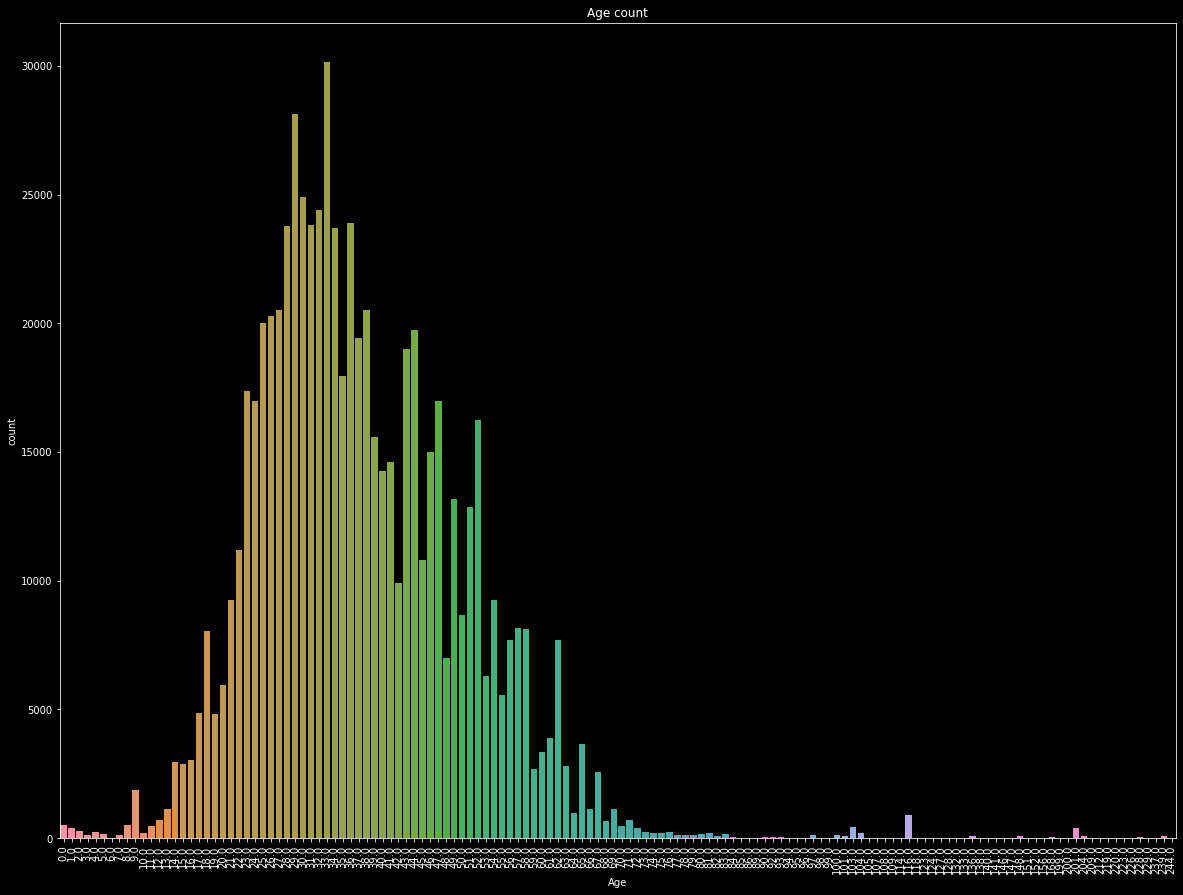

In [117]:
# counting the distribution of age
plt.figure(figsize = (20,15))
plt.title('Age count')
plt.xlabel('Ages')
plt.ylabel('Count of Ages')
plt.xticks(rotation = 90)
sns.countplot(x ='Age', data = df)
plt.show()

### Most reviewed Authors

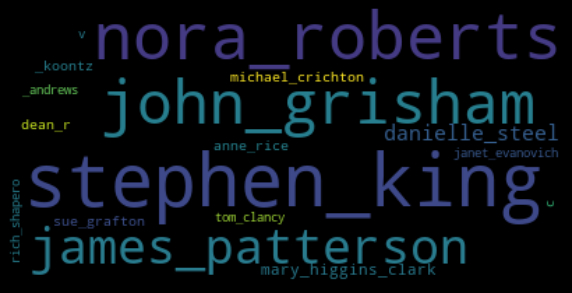

In [118]:
#
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# creating a string for the word cloud
rev_2000 =  df.Author.value_counts()[df.Author.value_counts() >= 2000]
word = list()
for reviews , name in zip(rev_2000.values, rev_2000.index):
  name = name.replace(' ', '_')
  name += ' '
  word.append(name * reviews)
words = ' '.join(word)

# mask = np.array(Image.open("/content/drive/MyDrive/AlmaBetter /Capstone Project/Book Recommendation System/pngwing.com (3).png"))

word_cloud = WordCloud( collocations=  False, background_color=None, mask  = None).generate(words)
plt.figure(figsize=[10,7])
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear' )
plt.axis("off")
# store to file
plt.savefig("authors.png", format="png")
plt.show()

### fetch Top Rated Books

In [119]:
# all those rows which have number of ratings above 100 
top = ratings.merge(books, on= 'ISBN', how = 'inner')['ISBN'].value_counts() > 100
temp_df = ratings.merge(books, on= 'ISBN', how = 'inner')
temp_df = temp_df[temp_df["ISBN"].isin(top[top == True].index)] 


In [120]:
temp_df.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
2,276727,0446520802,0,the notebook,nicholas sparks,1996,warner books,http://images.amazon.com/images/p/0446520802.01.thumbzzz.jpg,http://images.amazon.com/images/p/0446520802.01.mzzzzzzz.jpg,http://images.amazon.com/images/p/0446520802.01.lzzzzzzz.jpg
3,278418,0446520802,0,the notebook,nicholas sparks,1996,warner books,http://images.amazon.com/images/p/0446520802.01.thumbzzz.jpg,http://images.amazon.com/images/p/0446520802.01.mzzzzzzz.jpg,http://images.amazon.com/images/p/0446520802.01.lzzzzzzz.jpg
4,638,0446520802,0,the notebook,nicholas sparks,1996,warner books,http://images.amazon.com/images/p/0446520802.01.thumbzzz.jpg,http://images.amazon.com/images/p/0446520802.01.mzzzzzzz.jpg,http://images.amazon.com/images/p/0446520802.01.lzzzzzzz.jpg
5,3363,0446520802,0,the notebook,nicholas sparks,1996,warner books,http://images.amazon.com/images/p/0446520802.01.thumbzzz.jpg,http://images.amazon.com/images/p/0446520802.01.mzzzzzzz.jpg,http://images.amazon.com/images/p/0446520802.01.lzzzzzzz.jpg
6,7158,0446520802,10,the notebook,nicholas sparks,1996,warner books,http://images.amazon.com/images/p/0446520802.01.thumbzzz.jpg,http://images.amazon.com/images/p/0446520802.01.mzzzzzzz.jpg,http://images.amazon.com/images/p/0446520802.01.lzzzzzzz.jpg


In [121]:
# Top books filtering based on mean of ratings
top_books = temp_df.groupby('Book-Title')['Book-Rating'].mean()
# sort top books 
top_books = top_books.sort_values(ascending = False)

In [122]:
top_books

Book-Title
harry potter and the sorcerer's stone (book 1)                 6.363095
harry potter and the prisoner of azkaban (book 3)              5.867612
harry potter and the goblet of fire (book 4)                   5.824289
harry potter and the chamber of secrets (book 2)               5.343570
ender's game (ender wiggins saga (paperback))                  5.302564
                                                                 ...   
while my pretty one sleeps                                     1.529851
tom clancy's op-center (tom clancy's op center (paperback))    1.440299
whirlwind (tyler, book 1)                                      1.336449
pleading guilty                                                1.245614
wild animus                                                    1.019584
Name: Book-Rating, Length: 599, dtype: float64

In [123]:
top_books.index[:50]

Index(['harry potter and the sorcerer's stone (book 1)',
       'harry potter and the prisoner of azkaban (book 3)',
       'harry potter and the goblet of fire (book 4)',
       'harry potter and the chamber of secrets (book 2)',
       'ender's game (ender wiggins saga (paperback))',
       'the perks of being a wallflower',
       'the hobbit : the enchanting prelude to the lord of the rings',
       'to kill a mockingbird', 'the giver (21st century reference)',
       'ishmael: an adventure of the mind and spirit',
       'anne frank: the diary of a young girl',
       'charlotte's web (trophy newbery)', 'the other boleyn girl',
       'animal farm', 'the last juror', 'the da vinci code',
       'the catcher in the rye', 'dragonfly in amber',
       'stranger in a strange land (remembering tomorrow)', '1984',
       'dune (remembering tomorrow)', 'brave new world', 'the great gatsby',
       'east of eden (oprah's book club)',
       'the five people you meet in heaven', 'the stand

<function matplotlib.pyplot.show(*args, **kw)>

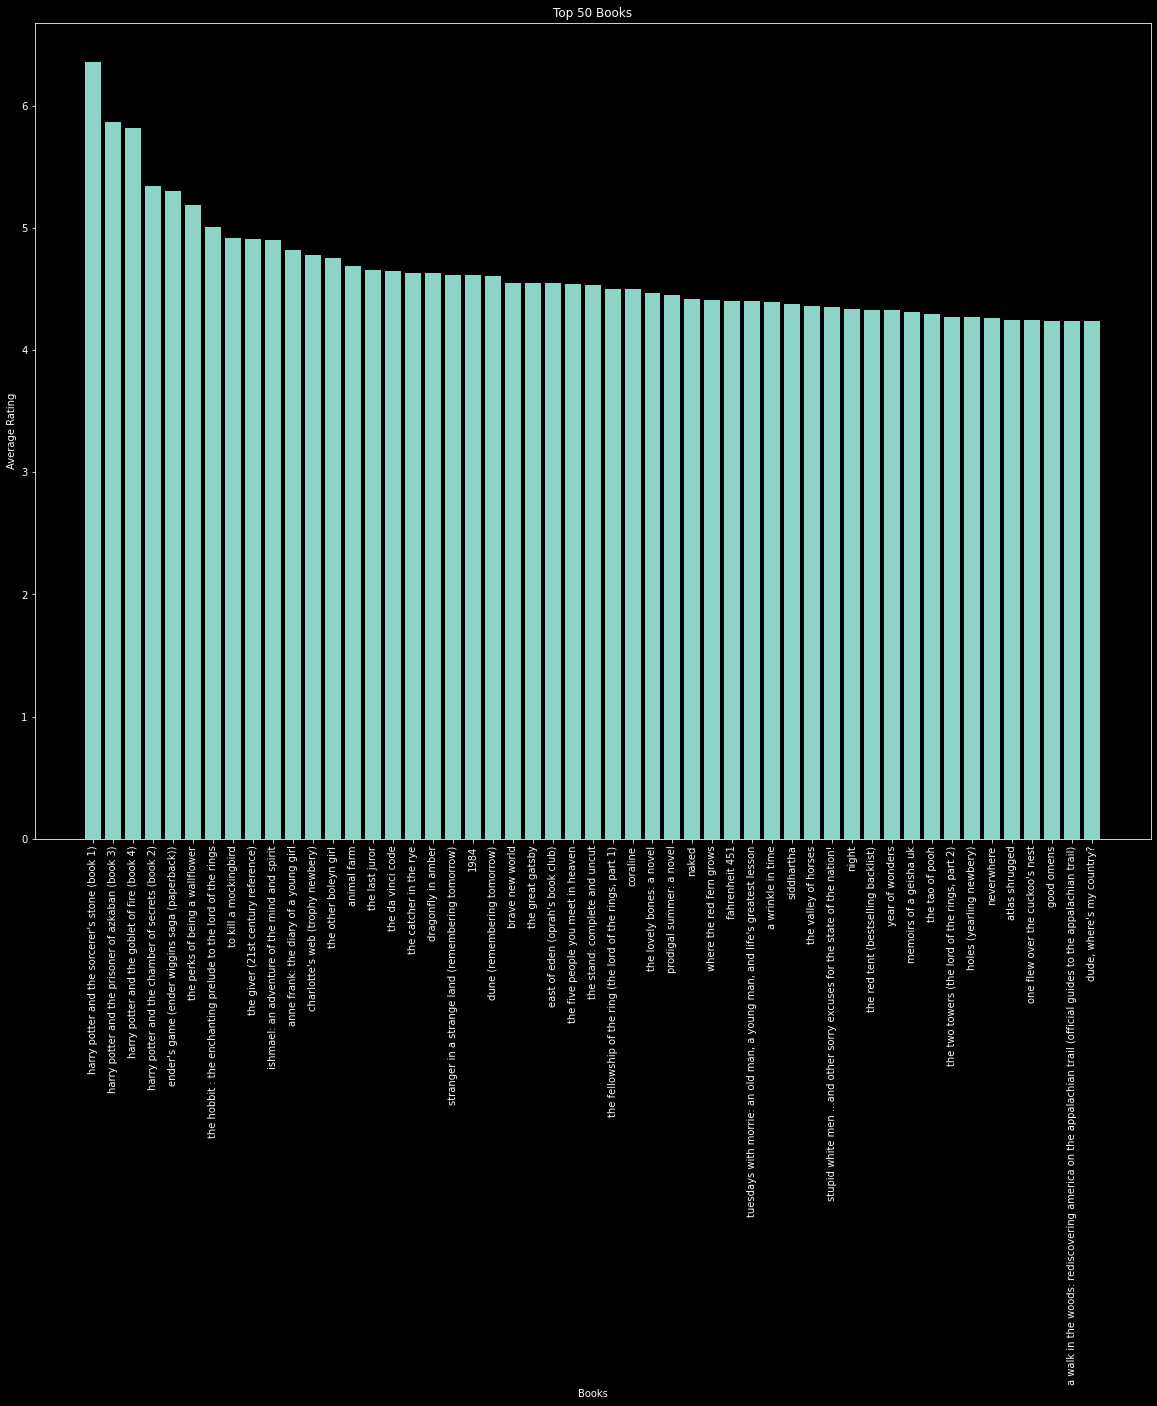

In [124]:
# top 50 highest rated Books
import matplotlib
plt.figure(figsize= (20,15),)
matplotlib.style.use('dark_background')
plt.title('Top 50 Books')
plt.xlabel('Books')
plt.ylabel('Average Rating')
plt.xticks(rotation = 90)
plt.bar( top_books.index[:51],top_books.values[:51] , width = 0.8,  )
plt.savefig('top_50_books.png' )
plt.show


# Feature engineering

### Add one Additional Feature Age_segment

In [125]:
# age group segmentation
def age_segment(age):
  if age < 13:
    return 'kid'
  elif age < 20:
    return 'teen'
  elif age < 45:
    return 'Adult'
  elif age >=45:
    return 'old'
age_cat = df.Age.apply(lambda x: age_segment(x))

# add that feature to df
df['age_segment'] = age_cat

### Segment wise ages of the Population

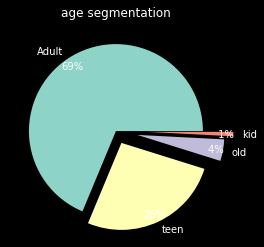

In [126]:
# sns.countplot(x = df['age_segment'], )
plt.title('age segmentation')
labels = ['Adult', 'teen', 'old', 'kid']
plt.pie(x = df['age_segment'].value_counts(), explode = [0.,0.15,0.25,0.35], labels = labels, rotatelabels= False, 
        autopct = '%2.0f%%', pctdistance= 0.9, wedgeprops= None, )
plt.show()

In [127]:
df.head()

,Uid,ISBN,Rating,Title,Author,Pub_Year,Publisher,Image_Url,Location,Age,age_segment
1,159181,0155061224,0,rites of passage,judith rae,2001,heinle,http://images.amazon.com/images/p/0155061224.01.mzzzzzzz.jpg,"seattle, washington, usa",28.0,Adult
2,276727,0446520802,0,the notebook,nicholas sparks,1996,warner books,http://images.amazon.com/images/p/0446520802.01.mzzzzzzz.jpg,"h, new south wales, australia",16.0,teen
3649,638,0446520802,0,the notebook,nicholas sparks,1996,warner books,http://images.amazon.com/images/p/0446520802.01.mzzzzzzz.jpg,"san diego, california, usa",20.0,Adult
3650,638,0316666343,10,the lovely bones: a novel,alice sebold,2002,"little, brown",http://images.amazon.com/images/p/0316666343.01.mzzzzzzz.jpg,"san diego, california, usa",20.0,Adult
3651,638,0375400699,10,love in the time of cholera (everyman's library (cloth)),gabriel garcia marquez,1997,everyman's library,http://images.amazon.com/images/p/0375400699.01.mzzzzzzz.jpg,"san diego, california, usa",20.0,Adult


## Selecting users which have rated atleast 5 books
## Selecting books which are rated atleast 10 times 
### To Avoid cold Start problem and to recommend books which genuinely have a good number of reviewers we need to sort the data

In [128]:
# keeping books which are rated atleast 10 times...
books_to_drop = df.ISBN.value_counts()[df.ISBN.value_counts() <= 10].index
df.drop( df[df['ISBN'].isin(books_to_drop)].index , inplace = True)

print(f"shape after removing books is {df.shape}")


shape after removing books is (292789, 11)


In [129]:
# keeping the users which have rated minimum 5 books...
print(f"shape before removing users is {df.shape}")
users_to_drop = df.Uid.value_counts()[df.Uid.value_counts() < 5].index
df.drop( df[df['Uid'].isin(users_to_drop)].index , inplace = True)
print(f"shape after removing users is {df.shape}")


shape before removing users is (292789, 11)
shape after removing users is (252588, 11)


In [130]:
df.head()

,Uid,ISBN,Rating,Title,Author,Pub_Year,Publisher,Image_Url,Location,Age,age_segment
3649,638,0446520802,0,the notebook,nicholas sparks,1996,warner books,http://images.amazon.com/images/p/0446520802.01.mzzzzzzz.jpg,"san diego, california, usa",20.0,Adult
3650,638,0316666343,10,the lovely bones: a novel,alice sebold,2002,"little, brown",http://images.amazon.com/images/p/0316666343.01.mzzzzzzz.jpg,"san diego, california, usa",20.0,Adult
3652,638,0385504209,10,the da vinci code,dan brown,2003,doubleday,http://images.amazon.com/images/p/0385504209.01.mzzzzzzz.jpg,"san diego, california, usa",20.0,Adult
3653,638,0345452550,0,a cold heart: an alex delaware novel,jonathan kellerman,2003,ballantine books,http://images.amazon.com/images/p/0345452550.01.mzzzzzzz.jpg,"san diego, california, usa",20.0,Adult
3654,638,0679746048,7,"girl, interrupted",susanna kaysen,1994,vintage,http://images.amazon.com/images/p/0679746048.01.mzzzzzzz.jpg,"san diego, california, usa",20.0,Adult


In [137]:
# except rating make all features as str
df = df.astype(str)
df['Rating'] = df['Rating'].astype('int64')
df.info()

In [143]:
# df[df.ISBN == '446520802']

# Save new DF to csv which we will use in modelling Notebook

In [139]:
df.to_csv('Books_data.csv')